In [ ]:
%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GRU, LSTM
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.model_selection import train_test_split
import re

In [ ]:

#Загружаем первую часть размеченного корпуса
negative = pd.read_csv("negative.csv", sep=';', header = None)

negative


,0,1,2,3,4,5,6,7,8,9,10,11
0,408906762813579264,1386325944,dugarchikbellko,на работе был полный пиддес :| и так каждое за...,-1,0,0,0,8064,111,94,2
1,408906818262687744,1386325957,nugemycejela,"Коллеги сидят рубятся в Urban terror, а я из-з...",-1,0,0,0,26,42,39,0
2,408906858515398656,1386325966,4post21,@elina_4post как говорят обещаного три года жд...,-1,0,0,0,718,49,249,0
3,408906914437685248,1386325980,Poliwake,"Желаю хорошего полёта и удачной посадки,я буду...",-1,0,0,0,10628,207,200,0
4,408906914723295232,1386325980,capyvixowe,"Обновил за каким-то лешим surf, теперь не рабо...",-1,0,0,0,35,17,34,0
...,...,...,...,...,...,...,...,...,...,...,...,...
111918,425138243257253888,1390195830,Yanch_96,Но не каждый хочет что то исправлять:( http://...,-1,0,0,0,1138,32,46,0
111919,425138339503943682,1390195853,tkit_on,скучаю так :-( только @taaannyaaa вправляет мо...,-1,0,0,0,4822,38,32,0
111920,425138437684215808,1390195876,ckooker1,"Вот и в школу, в говно это идти уже надо(",-1,0,0,1,165,13,16,0
111921,425138490452344832,1390195889,LisaBeroud,"RT @_Them__: @LisaBeroud Тауриэль, не грусти :...",-1,0,1,0,2516,187,265,0


In [ ]:
#Загружаем вторую часть размеченного корпуса
positive = pd.read_csv("positive.csv", sep=';', header = None)

positive

,0,1,2,3,4,5,6,7,8,9,10,11
0,408906692374446080,1386325927,pleease_shut_up,"@first_timee хоть я и школота, но поверь, у на...",1,0,0,0,7569,62,61,0
1,408906692693221377,1386325927,alinakirpicheva,"Да, все-таки он немного похож на него. Но мой ...",1,0,0,0,11825,59,31,2
2,408906695083954177,1386325927,EvgeshaRe,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,1,0,1,0,1273,26,27,0
3,408906695356973056,1386325927,ikonnikova_21,"RT @digger2912: ""Кто то в углу сидит и погибае...",1,0,1,0,1549,19,17,0
4,408906761416867842,1386325943,JumpyAlex,@irina_dyshkant Вот что значит страшилка :D\nН...,1,0,0,0,597,16,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...
114906,411368729235054592,1386912922,diminlisenok,"Спала в родительском доме, на своей кровати......",1,0,0,0,1497,56,34,2
114907,411368729424187392,1386912922,qilepocagotu,RT @jebesilofyt: Эх... Мы немного решили сокра...,1,0,1,0,692,225,210,0
114908,411368796537257984,1386912938,DennyChooo,"Что происходит со мной, когда в эфире #proacti...",1,0,0,0,4905,448,193,13
114909,411368797447417856,1386912938,bedowabymir,"""Любимая,я подарю тебе эту звезду..."" Имя како...",1,0,0,0,989,254,251,0


In [ ]:
#Выбираем 3 столбец, потому что предстоит работать только с текстом
positive_text = pd.DataFrame(positive.iloc[:, 3])
negative_text = pd.DataFrame(negative.iloc[:, 3])

In [ ]:
#Маркируем позитивные и негативные тексты за 0 и 1 в дополнительную колонку
positive_text['label'] = [1] * positive_text.shape[0]
negative_text['label'] = [0] * negative_text.shape[0]

In [ ]:
#Складываем тексты
labeled_tweets = pd.concat([positive_text, negative_text])

In [ ]:
#Исправим нумерацию корпуса
labeled_tweets.index = range(labeled_tweets.shape[0])

In [ ]:
#Переименуем колонки
labeled_tweets.columns = ['text', 'label']
labeled_tweets

,text,label
0,"@first_timee хоть я и школота, но поверь, у на...",1
1,"Да, все-таки он немного похож на него. Но мой ...",1
2,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,1
3,"RT @digger2912: ""Кто то в углу сидит и погибае...",1
4,@irina_dyshkant Вот что значит страшилка :D\nН...,1
...,...,...
226829,Но не каждый хочет что то исправлять:( http://...,0
226830,скучаю так :-( только @taaannyaaa вправляет мо...,0
226831,"Вот и в школу, в говно это идти уже надо(",0
226832,"RT @_Them__: @LisaBeroud Тауриэль, не грусти :...",0


In [ ]:
#Функция очистки текста от не кириллических символов
def clear_text(text):
    clear_text = re.sub(r'[^А-яЁё]+', ' ', text).lower()
    return " ".join(clear_text.split())

In [ ]:
#Делаем очищенные тексты
labeled_tweets['text_clear'] = labeled_tweets['text'].apply(lambda x: clear_text(str(x)))

In [ ]:
#Меняем тексты на обрабтанные в корпусе
labeledtweets = labeled_tweets[['text_clear','label']]
labeledtweets.columns = ['text','label']
labeledtweets

,text,label
0,хоть я и школота но поверь у нас то же самое о...,1
1,да все таки он немного похож на него но мой ма...,1
2,ну ты идиотка я испугалась за тебя,1
3,кто то в углу сидит и погибает от голода а мы ...,1
4,вот что значит страшилка но блин посмотрев все...,1
...,...,...
226829,но не каждый хочет что то исправлять,0
226830,скучаю так только вправляет мозги но я все рав...,0
226831,вот и в школу в говно это идти уже надо,0
226832,тауриэль не грусти обнял,0


In [ ]:
train, test = train_test_split(labeledtweets,
                        test_size = 0.2,
                        random_state = 128,
                       )

print(train.shape)
print(test.shape)

(181467, 2)
(45367, 2)


In [ ]:
for sample in [train, test]:
    print(sample[sample['label'] == 1].shape[0] / sample.shape[0])
train

0.506246314756953
0.5079463045826261


,text,label
23610,за м шинами собаки это души воленны гаишников,1
181822,может быть когда нибудь я высплюсь но это случ...,0
23051,правильные вещи девушка говорит почему в модны...,1
168645,ну почему я снова умер боже спасибо,0
159690,счастье и удача забыли о моем существовании,0
...,...,...
122402,очень хочу на тренировку,0
51210,а всё понял где не увидел этого,1
117074,как же я буду без дани одна тяжело,0
95717,азамат у тебя самый заразительный смех на каз ...,1


In [ ]:
filteredtext = train['text']
filteredtext[:10]

23610         за м шинами собаки это души воленны гаишников
181822    может быть когда нибудь я высплюсь но это случ...
23051     правильные вещи девушка говорит почему в модны...
168645                  ну почему я снова умер боже спасибо
159690          счастье и удача забыли о моем существовании
189693    спина полковника шорина который со слов мохнат...
2757      ахахах я теперь каждый раз так говорю когда ид...
35949                             я заплатил за это вассаби
66865                 ахаха как скажешь будут только внучки
67236     вот значит почему там все наши почти стояли эт...
Name: text, dtype: object

In [ ]:
num_words = 10000
max_tweet_len = 100

In [ ]:
y_train = train['label']
y_train

23610     1
181822    0
23051     1
168645    0
159690    0
         ..
122402    0
51210     1
117074    0
95717     1
220243    0
Name: label, Length: 181467, dtype: int64

In [ ]:
tokenizer = Tokenizer(num_words=num_words)

In [ ]:
tokenizer.fit_on_texts(filteredtext)

In [ ]:
sequences = tokenizer.texts_to_sequences(filteredtext)

In [ ]:
x_train = pad_sequences(sequences, maxlen=max_tweet_len)

In [ ]:
model = Sequential()
model.add(Embedding(num_words, 8, input_length=max_tweet_len))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_save_path = 'best_model.h5'
checkpoint_callback = ModelCheckpoint(model_save_path,
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [ ]:
history = model.fit(x_train,
                    y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[checkpoint_callback])

Epoch 1/5
1134/1135 [============================>.] - ETA: 0s - loss: 0.5702 - accuracy: 0.6972
Epoch 1: val_accuracy improved from -inf to 0.73238, saving model to best_model.h5
1135/1135 [==============================] - 84s 71ms/step - loss: 0.5703 - accuracy: 0.6972 - val_loss: 0.5339 - val_accuracy: 0.7324
Epoch 2/5
1135/1135 [==============================] - ETA: 0s - loss: 0.5092 - accuracy: 0.7470
Epoch 2: val_accuracy improved from 0.73238 to 0.73467, saving model to best_model.h5
1135/1135 [==============================] - 81s 71ms/step - loss: 0.5092 - accuracy: 0.7470 - val_loss: 0.5288 - val_accuracy: 0.7347
Epoch 3/5
1134/1135 [============================>.] - ETA: 0s - loss: 0.4890 - accuracy: 0.7604
Epoch 3: val_accuracy did not improve from 0.73467
1135/1135 [==============================] - 80s 70ms/step - loss: 0.4889 - accuracy: 0.7604 - val_loss: 0.5311 - val_accuracy: 0.7330
Epoch 4/5
1134/1135 [============================>.] - ETA: 0s - loss: 0.4743 - accu

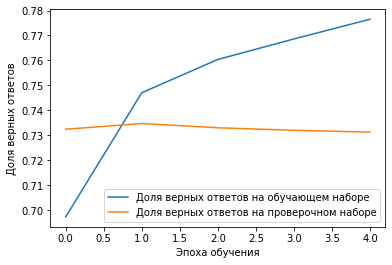

In [ ]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
model.load_weights(model_save_path)

In [ ]:
test

,text,label
23241,агаа вообще восхитительно только часто они мен...,1
202127,я думал что друзей теряют в ссорах оказалось о...,0
90988,не давайте повода и ревности не будет,1
163075,шли с кристей и обсуждали вот в других классов...,0
98621,че время так долго идет хочу в колледж быстрее...,1
...,...,...
154605,ооооо иисусе помоги мне дожить до каникул,0
222783,ппц бля заболела но в технарь ходить нужно пер...,0
187111,ну что за уродство будет елка без герлядны сам...,0
91721,люблю зиму за то что люди носом разблокируют т...,1


In [ ]:
test_sequences = tokenizer.texts_to_sequences(test['text'])

In [ ]:
x_test = pad_sequences(test_sequences, maxlen=max_tweet_len)

In [ ]:
y_test = test['label']

In [ ]:
model.evaluate(x_test, y_test, verbose=1)

1418/1418 [==============================] - 15s 11ms/step - loss: 0.5336 - accuracy: 0.7279


[0.5335614681243896, 0.727885901927948]